# Data Load & Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

univ_df = pd.read_excel('/content/gdrive/MyDrive/BOOT/final_df.xlsx') #엑셀 파일로 저장했을 경우
#univ_df = pd.read_csv(csv 파일 명.csv) #csv 파일로 저장했을 경우

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# 데이터 전처리

**전처리 방향성**



---

수집하고 병합한 데이터의 컬럼의 개수는 엄청 많고, 선형 회귀 모델은 컬럼의 개수가 너무 많을 경우 차원의 저주에 빠지기가 쉽고, 의미를 도출하기가 어려워서 Feature Selection을 중점으로 방향성을 잡아야 할 것이다.

Feature Selection을 할 때에는, 각각의 변수가 어떤 의미를 갖는지를 파악하는 것이 중요한다. 각 변수들을 출력해보고,데이터 분포를 확인하면서 각 변수의 활용성에 대해 고민해보자.


## 범주형 변수

**너무 세분화된 범주형 변수 찾기**



---



범주형 변수의 경우, 범주가 너무 세분화되어 있을 경우, One-Hot Encoding시 차원의 저주에 빠지기 쉽다. 따라서, 너무 세분화된 범주형 변수를 찾는 것이 우선일 것이다.

In [ ]:
# 너무 세분화된 범주형 변수가 어떤 것이 있는 지 출력해보고 판단하기
# 너무 세분화되었다는 것의 기준은 없기에, 직접 경향성을 따져보면서 어떻게 하는 게 좋을지를 생각해보자.

### 아래에 코드를 작성해주세요. ###

print(univ_df['설립'].unique())
print(univ_df['대계열'].unique())
print(len(univ_df['중계열'].unique()))
print(len(univ_df['소계열'].unique()))
print(len(univ_df['학과명'].unique()))
print(univ_df['계열'].unique())
print(univ_df['상세계열'].unique())
print(len(univ_df['상세계열'].unique()))
print(univ_df['모집군'].unique())

univ_df['대계열'].value_counts()

['국립' '국립대법인' '공립' '사립']
['인문계열' '사회계열' '공학계열' '자연계열' '의약계열' '교육계열' '예체능계열']
32
105
1129
['인문' '자연']
['어문•인문학' '경영•경제•무역' '관광•서비스' '금융•회계•세무' '법•정치•행정' '전기•전자•컴퓨터•통신'
 '신소재•화공•에너지' '농림•수산•환경' '물리•화학•생명•천문' '생활과학' '치의예' '사회•언론•매체' '사범계'
 '건설•토목•안전' '기타자연계' '생명공•의과학•보건' '수의예' '수학•통계' '의예' '약학' '복지•아동•가족'
 '기타인문계' '유아•특수교육' '기계•자동차•철도•항공•조선' '간호' '연극•영화•방송' '자유전공' '초등교육'
 '디자인•의류•뷰티' '미술•조형•공예' '무용•체육' '한의예' '사진•만화•게임' '물리•화학•생순위•천문' 15]
35
['다' '나' '가']


공학계열     802
사회계열     692
자연계열     582
인문계열     475
교육계열     368
의약계열     280
예체능계열     22
Name: 대계열, dtype: int64

**해당 변수에 대해 판단하기**



---

특정 범주형 변수가 너무 세분화되었다는 것이 파악이 됐다면, 이 중에서 어떤 것을 없애고, 어떤 것을 남길 건지를 생각해야 한다.

또한, 가능한 경우 Feature Engineering을 통해 변수의 범주를 낮출 수도 있을 것이다. 이것은 특히 특정 범주에 해당하는 데이터의 수가 너무 적을 때 해당할 수 있다.

예를 들어, '주야구분' 변수의 경우, "주간, 주야간, 주야간 + 주간, 원격"으로 나누어지는데, 주간을 제외한 다른 범주에 해당하는 데이터의 수가 너무 적기 때문에, 이 변수를 주간의 여부에 따라 주간 O / 주간 X로 나눌 수 있을 것이다.

또한, 필요할 경우 시각화를 통해 좀 더 분포에 대한 인사이트를 얻을 수도 있을 것이다.

In [ ]:
univ_df['학생모집정지여부'] = ~(univ_df['학생모집정지인원'] == 0)

# 열 이름 변경
univ_df.rename(columns={'학생모집정지여부': '학생모집정지여부'}, inplace=True)

print(univ_df['학생모집정지여부'])

0        True
1        True
2        True
3        True
4        True
        ...  
3216    False
3217    False
3218    False
3219    False
3220    False
Name: 학생모집정지여부, Length: 3221, dtype: bool


In [ ]:

univ_df.loc[univ_df['설립'] == '국립', '설립'] = '국가기관'
univ_df.loc[univ_df['설립'] == '국립대법인', '설립'] = '국가기관'
univ_df.loc[univ_df['설립'] == '공립', '설립'] = '국가기관'

In [ ]:
univ_df.loc[univ_df['캠퍼스'] == '제2캠퍼스', '캠퍼스'] = '분교'


**아래에 본인의 분석결과를 작성해주세요.**

**예시 (여기를 수정하여 작성)**
- 가나다군 ond-Hot Encoding
- 자연 /인문
- 국립/ 사립/ 국립대법인/공립
- 시도의 경우 One-Hot Encoding 예정.
- 시군구는 너무 많아서 drop 예정.

## 수치형 변수

**상관계수가 너무 높은 변수 목록 출력하기**



---


수치형 변수 간의 상관관계가 너무 높을 경우,선형 회귀 모델의 분석 결과의 품질이 낮아질 우려가 있다. 따라서, 우리는 상관계수가 너무 높은 수치형 변수를 골라낼 필요가 있다.

단, 여기에서 상관계수는 절대적인 기준이 될 수는 없으며, 참고자료로만 사용해야함을 기억해야 한다. 어디까지나 변수의 제거 여부를 판단하는 것은 실험자의 몫이다.

In [ ]:
conditions = [
    univ_df['전체 재학생수'] < 5000,
    (univ_df['전체 재학생수'] >= 5000) & (univ_df['전체 재학생수'] < 20000),
    univ_df['전체 재학생수'] >= 20000
]
choices = ['소', '중', '대']

univ_df['전체 재학생수'] = np.select(conditions, choices)

**아래에 본인의 분석결과를 작성해주세요.**

**예시 (여기를 수정하여 작성)**
- (원점수, 표준점수, 백분위)는 서로 상관계수가 높다. 이 중에서 표준점수만 남기고 나머지는 Drop하겠다.

## 결측치

선형 회귀 모델은 결측치를 허용하지 않으므로 결측치에 대한 신경을 써야 한다. 하지만 단순히 dropna를 쓰기에는 결측치가 많기에 너무 많은 데이터가 유실이 될 수 있다. 또한, 선형회귀에 유의미한 열들은 남겨 놓는 것이 중요하다.

주의해야할 점은, 전처리를 하면서 데이터가 얼마나 유실되는지, 너무 적은 데이터만 남는 게 아닌지 파악해야 한다.

또한, 전처리는 한번 한다고 끝나는 것이 아니고, 언제든 다시 돌아와서 전처리 방식이 바뀔 수도 있음을 인지해야 한다.

아래는 쉽게 결측치가 존재하는 열과 결측치의 수를 출력하는 함수이다.

In [ ]:
def show_nas(df):
    # 결측치 확인하고 개수가 많은 순서로 정렬
    missing_values = df.isnull().sum()
    missing_values.sort_values(ascending=False, inplace=True)

    # 결측치가 있는 열을 반환
    return missing_values[missing_values > 0]

In [ ]:
show_nas(univ_df)

Series([], dtype: int64)

## 분석 결과 수합하여 전처리하기

**전처리 방향성**



---

우리는 지금까지 범주형 변수, 수치형 변수 각각에 대해 어떤 방향성으로 전처리를 할 수 있을 지에 대해서 아이디어를 얻었다.

이제 그 아이디어들을 수합해 실제 전처리로 이을 차례다.


### One-Hot Encoding

One-Hot Encoding은 범주형 변수 중, 서로 순서적 관계가 없는 변수에 대해서 적용하는 인코딩 방식이다.하지만, 범주의 개수가 너무 많을 경우 차원의 저주에 빠질 수 있기에 주의해야 한다.

위의 과정에서 판단한 내용을 갖고, One-Hot Encoding을 적용해보자.

In [ ]:
### One-Hot Encoding 코드를 아래에 작성해주세요. ###

univ_df = pd.get_dummies(univ_df, columns = ['모집군', '설립','캠퍼스','전체 재학생수','계열'])

### Label Encoding

Label Encoding은 범주형 변수 중, 서로 순서적 관계가 있는 변수에 대해서 적용하는 인코딩 방식이다.

위의 과정에서 판단한 내용을 갖고, Label Encoding을 적용해보자.

우리는 여기에서, 대학 서열을 Label Encoding 해야 한다. 조 내에서 리서치를 통해서 흔히 여겨지는 대학 서열을 Label Encoding하자.

In [ ]:
### 대학 서열 Label Encoding 코드를 작성해주세요. ###
#Label Encoding은 함수를 정의하고, apply를 이용해 쉽게 수행할 수 있다.

#아래는 예시이다.

def univ_label_encoding(value):
  if value in ['서울대학교']:
    return 1
  elif value in  ['연세대학교', '고려대학교']:
    return 2
  elif value in  ['서강대학교', '성균관대학교', '한양대학교','이화여자대학교','경인교육대학교']:
    return 3
  elif value in ['중앙대학교','경희대학교','한국외국어대학교','서울시립대학교','공주교육대학교','진주교육대학교','부산교육대학교','전주교육대학교', '광주교육대학교','대구교육대학교' ]:
    return 4
  elif value in ['건국대학교','동국대학교','홍익대학교','숙명여자대학교','경북대학교','부산대학교']:
    return 5
  elif value in ['국민대학교','숭실대학교','세종대학교','단국대학교','한국항공대학교','인하대학교','성신여자대학교']:
    return 6
  elif value in ['광운대학교','상명대학교','가천대학교','전남대학교','아주대학교','충남대학교','서울과학기술대학교','덕성여자대학교','제주대학교']:
    return 7
  elif value in ['동아대학교','강원대학교','전북대학교','삼육대학교', '한국해양대학교', '용인대학교','경기대학교','가톨릭대학교', '인제대학교','부경대학교','계명대학교','경상국립대학교','서울여자대학교']:
    return 8
  elif value in  ['서경대학교', '신라대학교','가톨릭관동대학교', '한국기술교육대학교','창원대학교', '수원대학교', '한성대학교','한국교통대학교','한남대학교','한국공학대학교','충북대학교',
                  '조선대학교','영남대학교','부산가톨릭대학교','대구가톨릭대학교', '대구대학교','울산대학교', '한밭대학교','부산외국어대학교','원광대학교','동서대학교','고신대학교','동덕여자대학교']:
    return 9
  elif value in  ['상지대학교','유원대학교','위덕대학교','경동대학교','경성대학교','경일대학교','동의대학교','호남대학교','군산대학교','목포해양대학교','세한대학교','한일장신대학교',
                  '동명대학교','영산대학교','경주대학교','대구한의대학교', '성공회대학교','한서대학교','공주대학교', '순천향대학교','안동대학교','강남대학교','광주여자대학교','창신대학교','우석대학교',
                  '남부대학교','목포대학교']:
    return 10
  elif value in ['안양대학교','한세대학교','강릉원주대학교','나사렛대학교', '순천대학교','청주대학교','경남대학교','서원대학교', '성결대학교','호서대학교','경운대학교','협성대학교','을지대학교','동신대학교'
                 '전주대학교','백석대학교','건양대학교','평택대학교', '초당대학교', '김천대학교','선문대학교' ,'서울한영대학교', '목포가톨릭대학교','세명대학교','예수대학교','대전대학교','서울신학대학교']:
    return 11
  elif value in ['한국성서대학교','중부대학교',  '극동대학교','송원대학교','동양대학교','한림대학교','대진대학교','남서울대학교','목원대학교','칼빈대학교','광신대학교','배재대학교','금오공과대학교']:
    return 12

  else:
    return 13

univ_df['학교명'] = univ_df['대학명'].apply(univ_label_encoding)

### Feature Engineering

In [ ]:
univ_df.columns

Index(['대학명', '대계열', '중계열', '소계열', '학과명', '입학정원_학부_계', '정원내_입학정원_학부',
       '정원외_입학정원_학부', '모집인원_학부_계', '정원내_모집인원_학부', '정원외_모집정원_학부', '지원자_전체_계',
       '지원자_전체_남', '지원자_전체_여', '입학자_전체_계', '입학자_전체_남', '입학자_전체_여',
       '정원내_입학자_전체_계', '정원내_입학자_전체_남', '정원내_입학자_전체_여', '정원내_입학자_학부_계',
       '정원내_입학자_학부_남', '정원내_입학자_학부_여', '정원외_입학자_전체_계', '정원외_입학자_전체_남',
       '정원외_입학자_전체_여', '재적생_전체_계', '재적생_전체_남', '재적생_전체_여', '재학생_전체_계',
       '재학생_전체_남', '재학생_전체_여', '전임교원_계', '전임교원_남', '전임교원_여', '상세계열', '모집인원',
       '최종 경쟁률', '원점수', '표준점수', '백분위', '대학코드', '정원내 재학생수', '학생정원', '학생모집정지인원',
       '재학생충원율(정원내)', '졸업자수', '취업자수', '제외자수', '취업률', '전체 입학자수', '정원내 입학자수',
       '정원내 모집인원', '신입생충원율(정원내)', '총교육비', '재학생수(교육비)', '학생 1인당 교육비',
       '전임교원수(재학생기준)', '재학생수(전임교원)', '교원 법정정원(재학생기준)', '전임교원 확보율(재학생기준)',
       '재학생수(장학금)', '장학금 총액', '교내 + 사설 및 기타', '학생 1인당 장학금', '학생모집정지여부',
       '모집군_가', '모집군_나', '모집군_다', '설립_국가기관', '설립_사립', '캠퍼스_본교', '캠퍼스_분교',
       '전체 재학생수_대', '전체 재학생수_소', '전체 재학생수_중', '계열_인문

Feature Engineering을 통해 우리는 주어진 데이터로부터 유의한 지표를 도출하고, 더 나아가 선형회귀모델의 품질을 향상하고 더 많은 의미를 도출할 수 있다.

여러 방식으로 갖고 있는 변수들로 어떻게 의미 있는 변수를 만들 수 있을 지 고민하고, 새로운 Feature를 만들어보자.

**예시**

- 각 학과별 입학자, 모집인원의 수 데이터를 갖고 학과별 충원율 변수를 만들 수 있다.
- 각 학과별 전임교원의 수, 재학생 수 데이터를 갖고 재학생 대비 전임교원 비율 변수를 만들 수 있다.

In [ ]:

univ_df1 = univ_df[(univ_df['재학생_전체_남']==0) & (univ_df['재학생_전체_여']==0)]
univ_df2 = univ_df[(univ_df['재학생_전체_남']!=0) & (univ_df['재학생_전체_여']==0)]
univ_df3 = univ_df[~univ_df.index.isin(univ_df1.index) & ~univ_df.index.isin(univ_df2.index)]

univ_df1.loc[univ_df1['대학명'] == '강릉원주대학교', '재학생_성비'] = 1.75
univ_df1.loc[univ_df1['대학명'] == '서울대학교', '재학생_성비'] = 1.77
univ_df1.loc[univ_df1['대학명'] == '경상국립대학교', '재학생_성비'] =1.57
univ_df1.loc[univ_df1['대학명'] == '군산대학교', '재학생_성비'] = 2.38
univ_df1.loc[univ_df1['대학명'] == '순천대학교', '재학생_성비'] = 1.48
univ_df1.loc[univ_df1['대학명'] == '전북대학교', '재학생_성비'] = 1.58
univ_df1.loc[univ_df1['대학명'] == '서울과학기술대학교', '재학생_성비'] = 2.02
univ_df1.loc[univ_df1['대학명'] == '경동대학교', '재학생_성비'] = 0.54
univ_df1.loc[univ_df1['대학명'] == '대구한의대학교', '재학생_성비'] = 1.03
univ_df1.loc[univ_df1['대학명'] == '경주대학교', '재학생_성비'] = 1.71
univ_df1.loc[univ_df1['대학명'] == '고려대학교', '재학생_성비'] = 1.36
univ_df1.loc[univ_df1['대학명'] == '대구대학교', '재학생_성비'] = 1.46
univ_df1.loc[univ_df1['대학명'] == '동국대학교', '재학생_성비'] = 1.17
univ_df1.loc[univ_df1['대학명'] == '동서대학교', '재학생_성비'] = 1.23
univ_df1.loc[univ_df1['대학명'] == '동의대학교', '재학생_성비'] = 1.51
univ_df1.loc[univ_df1['대학명'] == '부산외국어대학교', '재학생_성비'] = 1.15
univ_df1.loc[univ_df1['대학명'] == '숭실대학교', '재학생_성비'] = 1.44
univ_df1.loc[univ_df1['대학명'] == '연세대학교', '재학생_성비'] = 1.28
univ_df1.loc[univ_df1['대학명'] == '영남대학교', '재학생_성비'] = 1.41
univ_df1.loc[univ_df1['대학명'] == '울산대학교', '재학생_성비'] = 1.62
univ_df1.loc[univ_df1['대학명'] == '중앙대학교', '재학생_성비'] = 1.21
univ_df1.loc[univ_df1['대학명'] == '한남대학교', '재학생_성비'] = 1.14
univ_df1.loc[univ_df1['대학명'] == '홍익대학교', '재학생_성비'] = 1.14
univ_df1.loc[univ_df1['대학명'] == '동명대학교', '재학생_성비'] = 2.03

univ_df2['재학생_성비'] = univ_df2['재학생_전체_남'] / univ_df2['재학생_전체_여']+1
univ_df3['재학생_성비'] = univ_df3['재학생_전체_남'] / univ_df3['재학생_전체_여']

univ_df = pd.concat([univ_df1, univ_df2, univ_df3])

<ipython-input-102-52ebbafbaff3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univ_df1.loc[univ_df1['대학명'] == '강릉원주대학교', '재학생_성비'] = 1.75
<ipython-input-102-52ebbafbaff3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univ_df2['재학생_성비'] = univ_df2['재학생_전체_남'] / univ_df2['재학생_전체_여']+1
<ipython-input-102-52ebbafbaff3>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

### Drop Columns ###

위의 분석 결과를 토대로, 우리는 이제 필요가 없어진 변수들을 drop할 수 있다. 이를 수행해보자.

이때, drop을 수행할 때에는 웬만하면 새로운 변수에 결과를 할당하여 롤백이 가능할 수 있게 세팅해두자.

In [ ]:
univ_df.columns

Index(['대학명', '대계열', '중계열', '소계열', '학과명', '입학정원_학부_계', '정원내_입학정원_학부',
       '정원외_입학정원_학부', '모집인원_학부_계', '정원내_모집인원_학부', '정원외_모집정원_학부', '지원자_전체_계',
       '지원자_전체_남', '지원자_전체_여', '입학자_전체_계', '입학자_전체_남', '입학자_전체_여',
       '정원내_입학자_전체_계', '정원내_입학자_전체_남', '정원내_입학자_전체_여', '정원내_입학자_학부_계',
       '정원내_입학자_학부_남', '정원내_입학자_학부_여', '정원외_입학자_전체_계', '정원외_입학자_전체_남',
       '정원외_입학자_전체_여', '재적생_전체_계', '재적생_전체_남', '재적생_전체_여', '재학생_전체_계',
       '재학생_전체_남', '재학생_전체_여', '전임교원_계', '전임교원_남', '전임교원_여', '상세계열', '모집인원',
       '최종 경쟁률', '원점수', '표준점수', '백분위', '대학코드', '정원내 재학생수', '학생정원', '학생모집정지인원',
       '재학생충원율(정원내)', '졸업자수', '취업자수', '제외자수', '취업률', '전체 입학자수', '정원내 입학자수',
       '정원내 모집인원', '신입생충원율(정원내)', '총교육비', '재학생수(교육비)', '학생 1인당 교육비',
       '전임교원수(재학생기준)', '재학생수(전임교원)', '교원 법정정원(재학생기준)', '전임교원 확보율(재학생기준)',
       '재학생수(장학금)', '장학금 총액', '교내 + 사설 및 기타', '학생 1인당 장학금', '학생모집정지여부',
       '모집군_가', '모집군_나', '모집군_다', '설립_국가기관', '설립_사립', '캠퍼스_본교', '캠퍼스_분교',
       '전체 재학생수_대', '전체 재학생수_소', '전체 재학생수_중', '계열_인문

In [ ]:
drop_cols = ['정원내_입학정원_학부', '정원외_입학정원_학부', '모집인원_학부_계', '정원내_모집인원_학부', '정원외_모집정원_학부',
             '재적생_전체_계', '재적생_전체_남', '재적생_전체_여', '정원내 재학생수', '학생정원', '졸업자수','지원자_전체_남', '지원자_전체_여', '입학자_전체_계', '입학자_전체_남', '입학자_전체_여',
             '정원내_입학자_전체_계', '정원내_입학자_전체_남', '정원내_입학자_전체_여', '정원외_입학자_전체_계', '정원외_입학자_전체_남',
             '정원외_입학자_전체_여', '재적생_전체_계', '재적생_전체_남', '재적생_전체_여', '재학생_전체_계','백분위','학생모집정지인원',
             '취업자수', '제외자수', '전체 입학자수', '정원내 입학자수', '정원내 모집인원','교원 법정정원(재학생기준)', '재학생_전체_남', '재학생_전체_여',
             '재학생수(장학금)','교내 + 사설 및 기타','전임교원_남', '전임교원_여','원점수','재학생수(교육비)','지원자_전체_계','상세계열','대학코드'
             ]
# drop() 메소드를 사용하여 해당 열 제거. univ_df_drop 변수에 할당해 롤백 가능하게 해두기
#univ_df_drop = univ_df.drop(columns=drop_cols)

In [ ]:
univ_df_drop = univ_df.drop(columns=drop_cols)

In [ ]:
univ_df_drop.columns

Index(['대학명', '대계열', '중계열', '소계열', '학과명', '입학정원_학부_계', '정원내_입학자_학부_계',
       '정원내_입학자_학부_남', '정원내_입학자_학부_여', '전임교원_계', '모집인원', '최종 경쟁률', '표준점수',
       '재학생충원율(정원내)', '취업률', '신입생충원율(정원내)', '총교육비', '학생 1인당 교육비',
       '전임교원수(재학생기준)', '재학생수(전임교원)', '전임교원 확보율(재학생기준)', '장학금 총액', '학생 1인당 장학금',
       '학생모집정지여부', '모집군_가', '모집군_나', '모집군_다', '설립_국가기관', '설립_사립', '캠퍼스_본교',
       '캠퍼스_분교', '전체 재학생수_대', '전체 재학생수_소', '전체 재학생수_중', '계열_인문', '계열_자연',
       '학교명', '재학생_성비'],
      dtype='object')

In [ ]:
import numpy as np

# 상관관계 행렬 계산
correlation_matrix = univ_df_drop.corr()

# 상관계수의 절대값이 0.8 이상이거나 -0.8 이하인 변수들의 쌍 찾기 (0.8 말고 다른 기준을 대입해도 됨)
high_corr_var = np.where(np.abs(correlation_matrix) > 0.8)
high_corr_var = [(correlation_matrix.columns[x], correlation_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]

# 높은 상관관계를 가진 변수들의 쌍과 상관계수의 절대값을 내림차순으로 정렬
sorted_high_corr_var = sorted(high_corr_var, key=lambda x: np.abs(correlation_matrix[x[0]][x[1]]), reverse=True)

# 높은 상관관계를 가진 변수들의 쌍, 상관계수의 절대값 출력

for var_pair in sorted_high_corr_var:
    print(var_pair, correlation_matrix[var_pair[0]][var_pair[1]])


('설립_국가기관', '설립_사립') -1.0000000000000002
('캠퍼스_본교', '캠퍼스_분교') -1.0000000000000002
('계열_인문', '계열_자연') -1.0
('총교육비', '전임교원수(재학생기준)') 0.93779366616335
('전임교원수(재학생기준)', '재학생수(전임교원)') 0.9250181976838284
('입학정원_학부_계', '정원내_입학자_학부_계') 0.9022442539845815
('총교육비', '재학생수(전임교원)') 0.862621934909683
('총교육비', '학생 1인당 교육비') 0.8625865716036808
('재학생수(전임교원)', '장학금 총액') 0.8515539663889403
('정원내_입학자_학부_계', '정원내_입학자_학부_남') 0.8396192843827937
('최종 경쟁률', '신입생충원율(정원내)') 0.820093742360419


<ipython-input-107-c6d0d6883c83>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = univ_df_drop.corr()


In [ ]:
univ_df_drop.to_excel('/content/gdrive/MyDrive/BOOT/drop.xlsx',index = False)

### 수치형 변수의 변환을 위한 시각화

수치형 변수의 경우 이상치가 너무 많을 경우, 데이터 분포가 크게 쏠려있을 경우, 선형회귀모델의 품질을 악화시킬 우려가 있다.

따라서, 데이터 분포를 확인하고, 이상치를 확인하여 적절한 변환 및 이상치 처리를 해보도록 하자.

아래의 함수들을 참조하여, 빠르게 분포를 확인하고 이상치를 확인해보자.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

univ_df_drop = pd.read_excel('/content/gdrive/MyDrive/BOOT/drop.xlsx') #엑셀 파일로 저장했을 경우
#univ_df = pd.read_csv(csv 파일 명.csv) #csv 파일로 저장했을 경우

In [ ]:
numeric_columns = univ_df_drop.select_dtypes(include=['int64', 'float64']).columns
list_numeric_columns = list(numeric_columns)

In [ ]:
elements_to_remove = ['신입생충원율(정원내)', '전체 재학생수_대','전체 재학생수_중','전체 재학생수_소', '모집군_가', '모집군_나', '모집군_다', '설립_국가기관', '설립_사립', '캠퍼스_본교', '캠퍼스_분교', '학교명','계열_자연','계열_인문']
  # 제거할 항목들의 리스트
for element in elements_to_remove:
    list_numeric_columns.remove(element)

print(list_numeric_columns)

['입학정원_학부_계', '정원내_입학자_학부_계', '정원내_입학자_학부_남', '정원내_입학자_학부_여', '전임교원_계', '모집인원', '최종 경쟁률', '표준점수', '재학생충원율(정원내)', '취업률', '총교육비', '학생 1인당 교육비', '전임교원수(재학생기준)', '재학생수(전임교원)', '전임교원 확보율(재학생기준)', '장학금 총액', '학생 1인당 장학금', '재학생_성비']


In [ ]:
len(list_numeric_columns)

18

In [ ]:
#필요한 라이브러리 import하고 폰트 설정

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rc('font', family='NanumBarunGothic')  # 나눔바른고딕 적용하기

In [ ]:
#주어진 데이터프레임의 컬럼명별 histplot을 그려주는 함수
def histplot(df, column_name):
    plt.figure(figsize=(15,5))  # 10은 너비, 6은 높이
    sns.histplot(df, x = column_name)
    plt.title(f'Data distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.show()


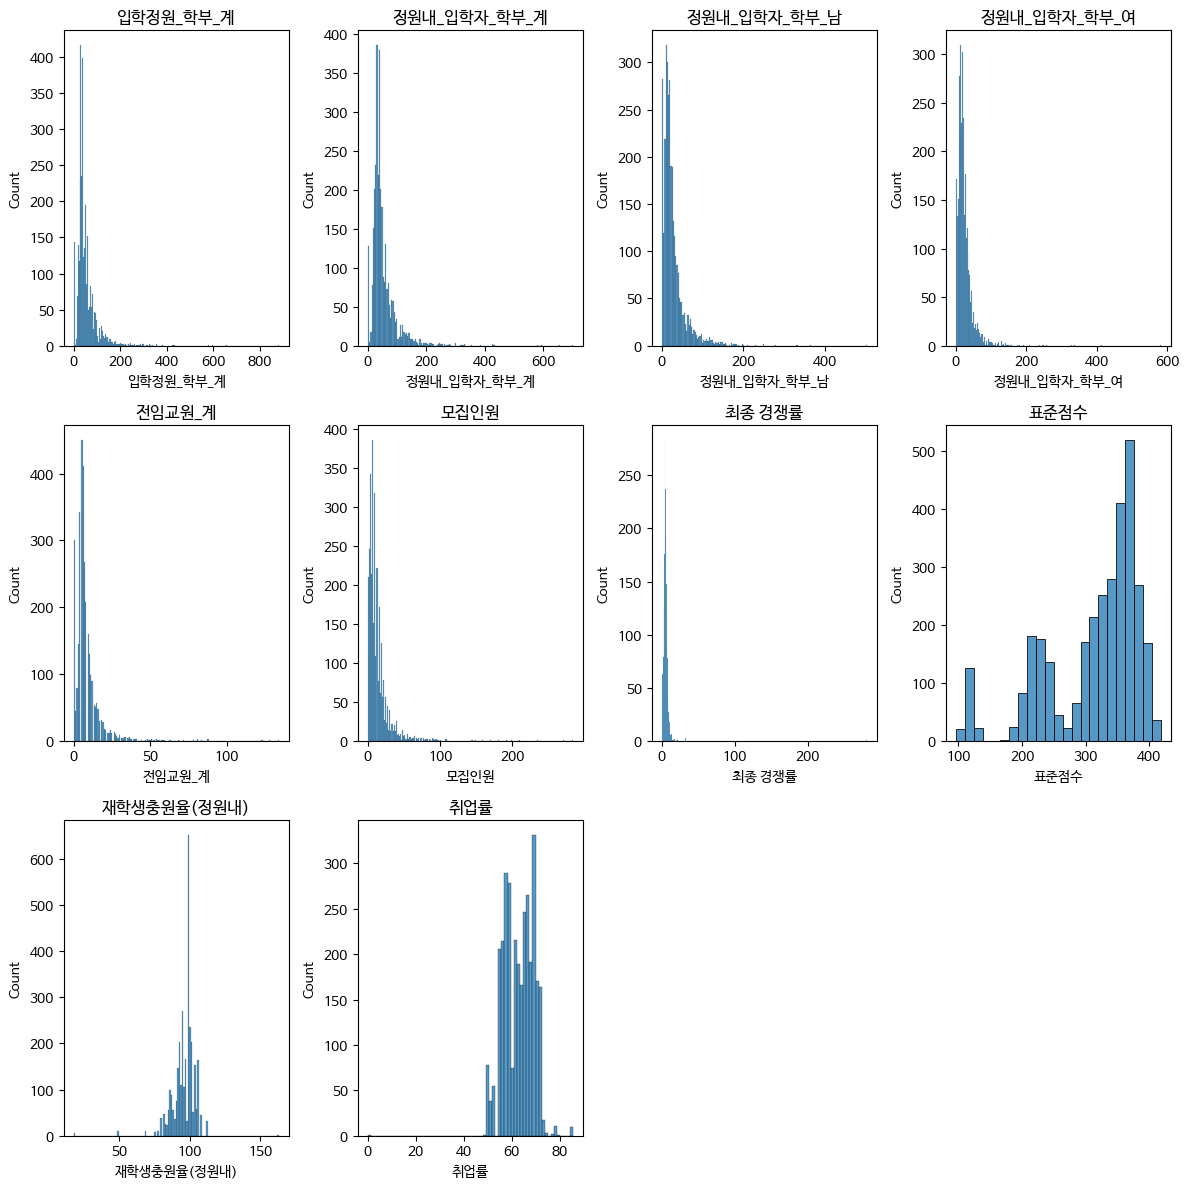

In [ ]:
# 처음부터 10개 histogram
num_plots = len(list_numeric_columns[:10])
data = list_numeric_columns[:10]

# 그래프를 그릴 서브플롯 생성
rows, cols = 3, 4
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))

# 서브플롯에 데이터 그래프 그리기
for i, ax in enumerate(axes.flatten()):
    if i < num_plots:
        sns.histplot(data=univ_df_drop[data[i]], ax=ax)
        ax.set_title(list_numeric_columns[i])

# 빈 서브플롯 숨기기
for i in range(num_plots, rows * cols):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()

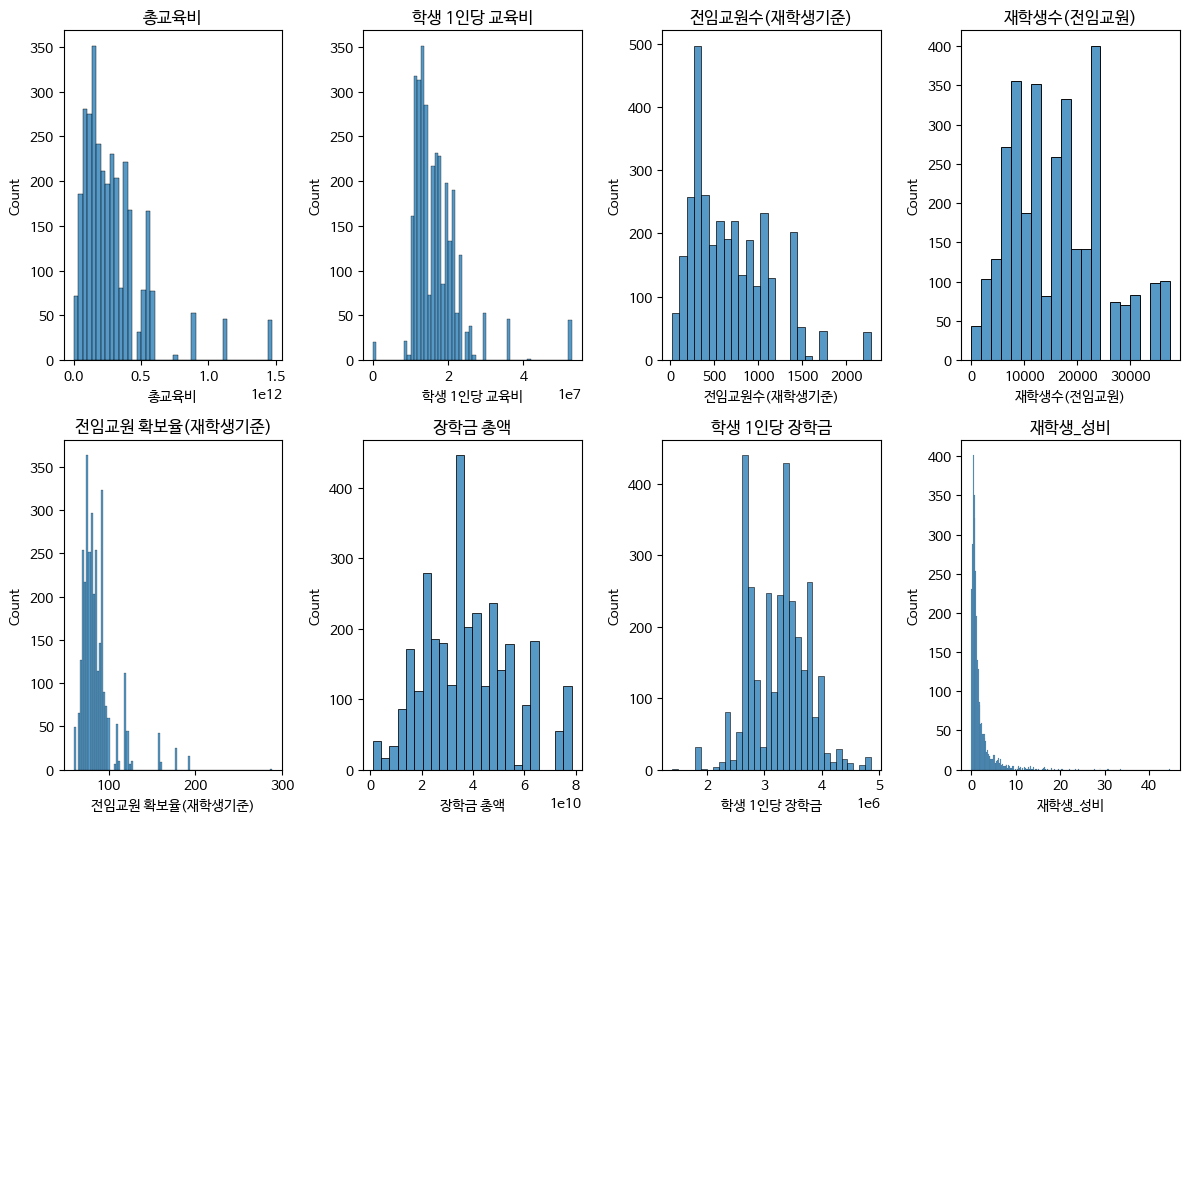

In [ ]:
# 나머지 histogram
num_plots = len(list_numeric_columns[10:])
data = list_numeric_columns[10:]

# 그래프를 그릴 서브플롯 생성
rows, cols = 3, 4
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))

# 서브플롯에 데이터 그래프 그리기
for i, ax in enumerate(axes.flatten()):
    if i < num_plots:
        sns.histplot(data=univ_df_drop[data[i]], ax=ax)
        ax.set_title(list_numeric_columns[i+10])

# 빈 서브플롯 숨기기
for i in range(num_plots, rows * cols):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#주어진 데이터프레임의 컬럼명별 boxplot을 그려주는 함수

def boxplot(df, column_name):
    plt.figure(figsize=(15,5))  # 10은 너비, 6은 높이
    sns.boxplot(x=df[column_name])
    plt.title(f'Box plot of {column_name}')
    plt.show()

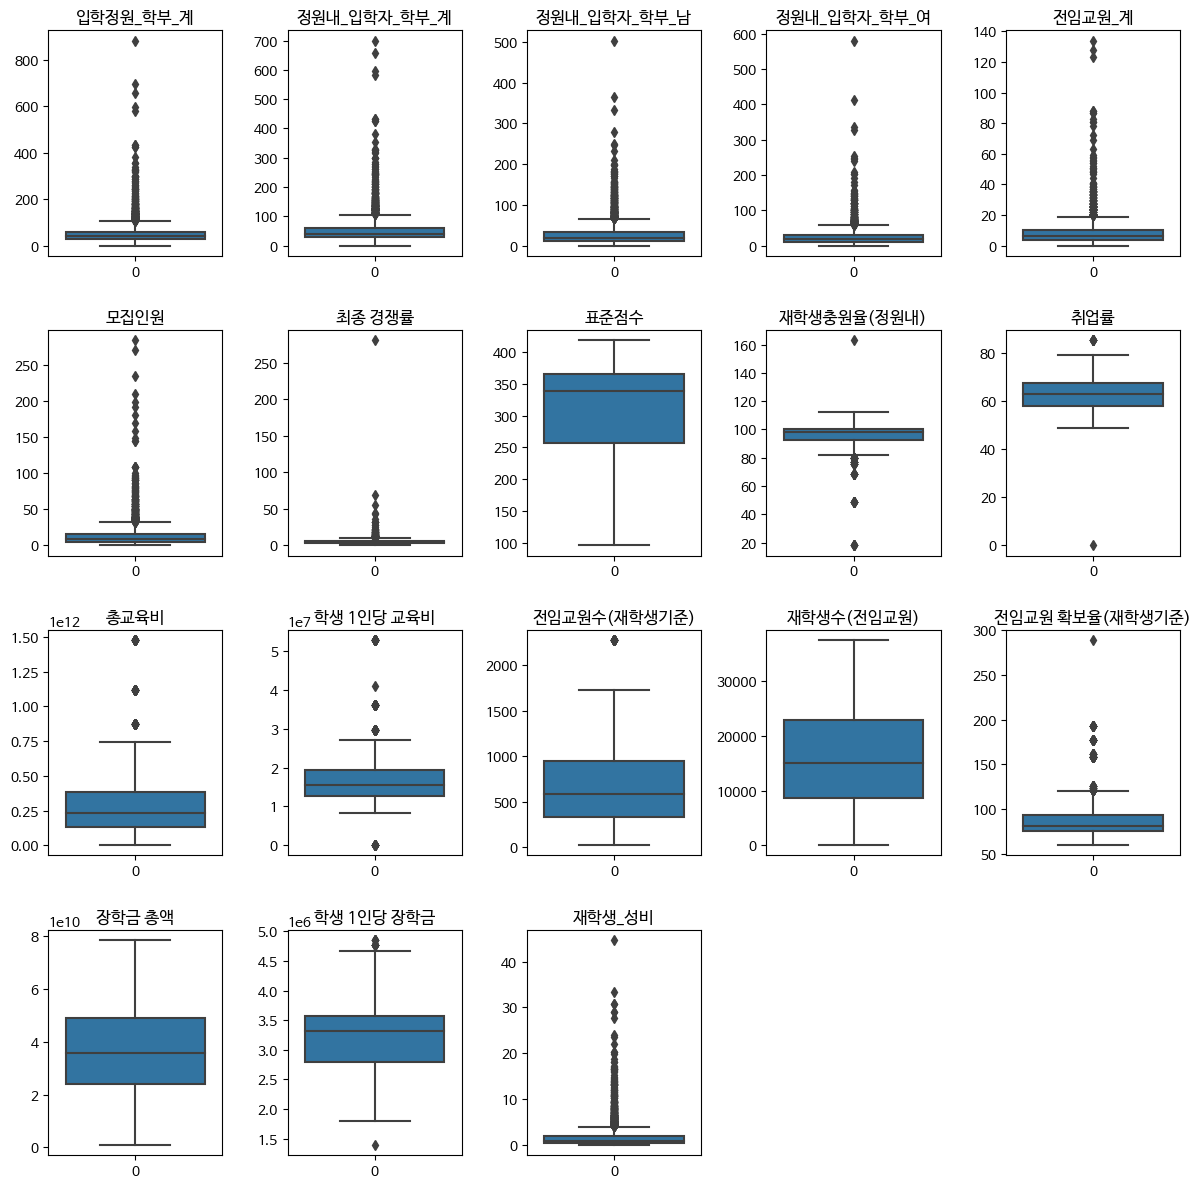

In [ ]:
num_plots = len(list_numeric_columns)
data = list_numeric_columns

# 그래프를 그릴 서브플롯 생성
rows, cols = 4, 5
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))

# 서브플롯에 데이터 그래프 그리기
for i, ax in enumerate(axes.flatten()):
    if i < num_plots:
        sns.boxplot(data=univ_df_drop[data[i]], ax=ax)
        ax.set_title(f'{data[i]}')


# 빈 서브플롯 숨기기
for i in range(num_plots, rows * cols):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#주어진 데이터프레임의 컬럼명별 이상치를 찾아주고 데이터 프레임으로 반환하는 함수

def find_outliers(df, column_name, asc):
    # Q1, Q3, 그리고 IQR을 계산
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치의 기준을 Q1과 Q3에서 각각 1.5 IQR만큼 떨어져있을 때로 정의. (꼭 이렇게 할 필요는 없음.)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 기준으로 주어진 데이터 프레임 인덱싱
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    #가장 큰값부터 정렬한 데이터 프레임 반환
    return outliers[[column_name]].sort_values(column_name, ascending = asc)

아래에 코드를 작성해주세요.

In [ ]:
# 이상치 제거
for column_name in list_numeric_columns:
    outliers = find_outliers(univ_df_drop, column_name, asc=True) # 이상치 탐지
    univ_df_drop[f'{column_name}'] = univ_df_drop[f'{column_name}'].drop(outliers.index) # 이상치 제거
    univ_df_drop[f'{column_name}'].fillna(np.nanpercentile(univ_df_drop[f'{column_name}'], 75), inplace=True)

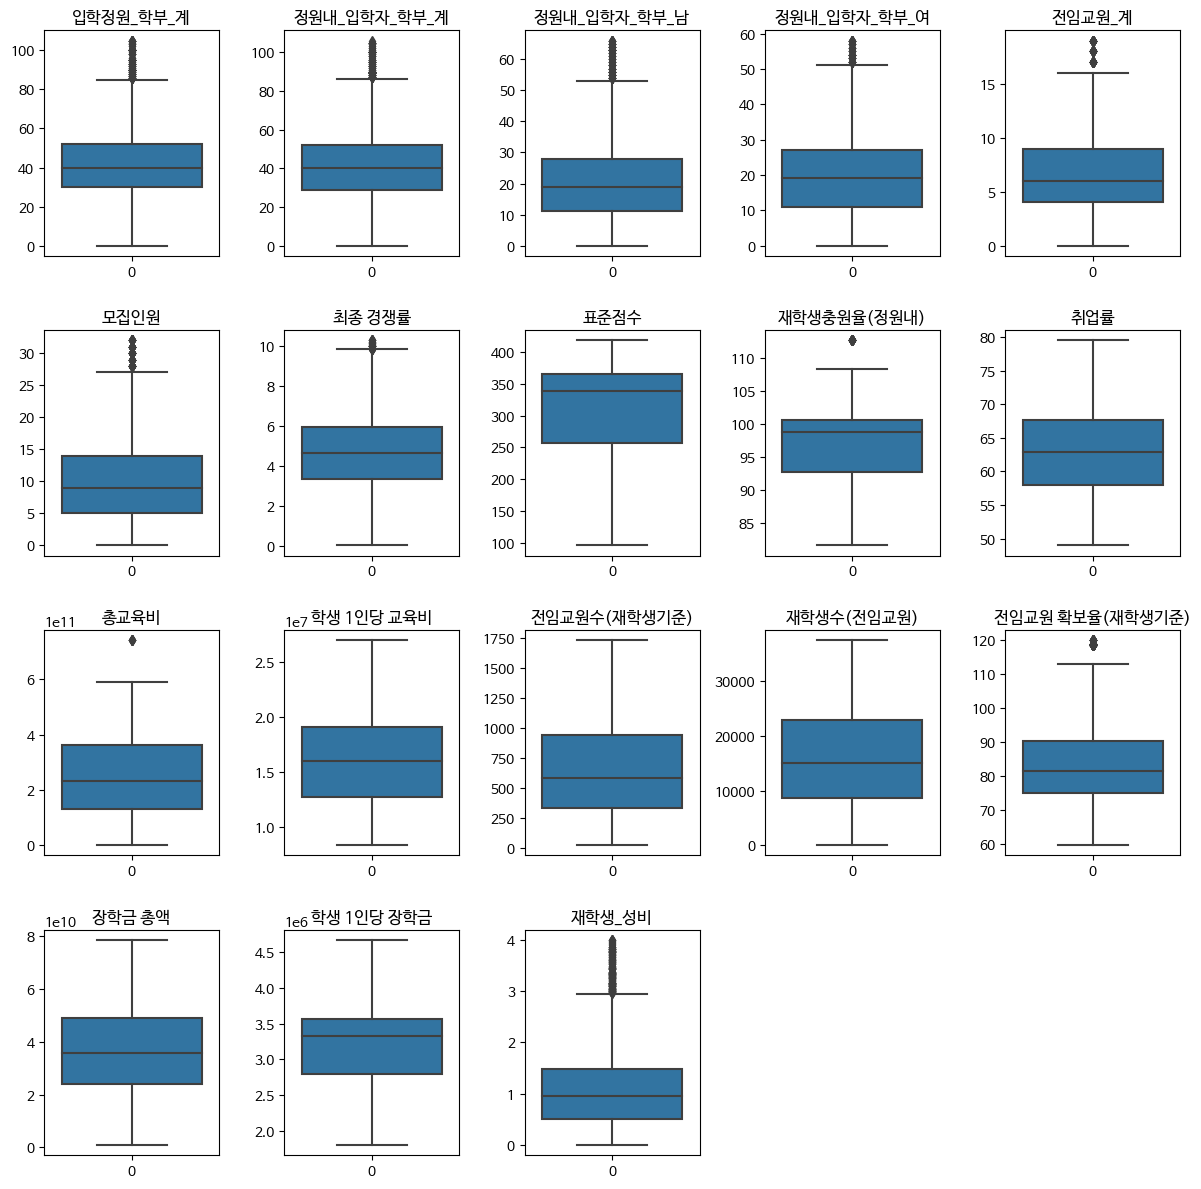

In [ ]:
# 이상치 제거 결과 확인

num_plots = len(list_numeric_columns)
data = list_numeric_columns

# 그래프를 그릴 서브플롯 생성
rows, cols = 4, 5
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))

# 서브플롯에 데이터 그래프 그리기
for i, ax in enumerate(axes.flatten()):
    if i < num_plots:
        sns.boxplot(data=univ_df_drop[data[i]], ax=ax)
        ax.set_title(f'{data[i]}')


# 빈 서브플롯 숨기기
for i in range(num_plots, rows * cols):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()

### 수치형 변수 정규화

시각화에서 확인한 내용을 바탕으로, 우리는 수치형 변수에 다양한 변환을 적용할 수 있다.

1. 로그 변환
- 로그 변환은 Right-Skewed된 분포에 적용될 수 있다.

2. 표준화
- 표준 변환은 데이터의 평균을 0, 표준 편차를 1로 변환해 데이터를 정규 분포에 가깝게 만드는 방법이다.

In [ ]:
log_data_columns = ['정원내_입학자_학부_계',
 '정원내_입학자_학부_남',
 '정원내_입학자_학부_여',
 '전임교원_계',
 '모집인원',
  '재학생_성비']

In [ ]:
import numpy as np
import pandas as pd

for i in log_data_columns:
    univ_df_drop[i] = univ_df_drop[i].apply(lambda x: 0 if x == 0 else np.log(x))

<ipython-input-125-ec931fb7319b>:19: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


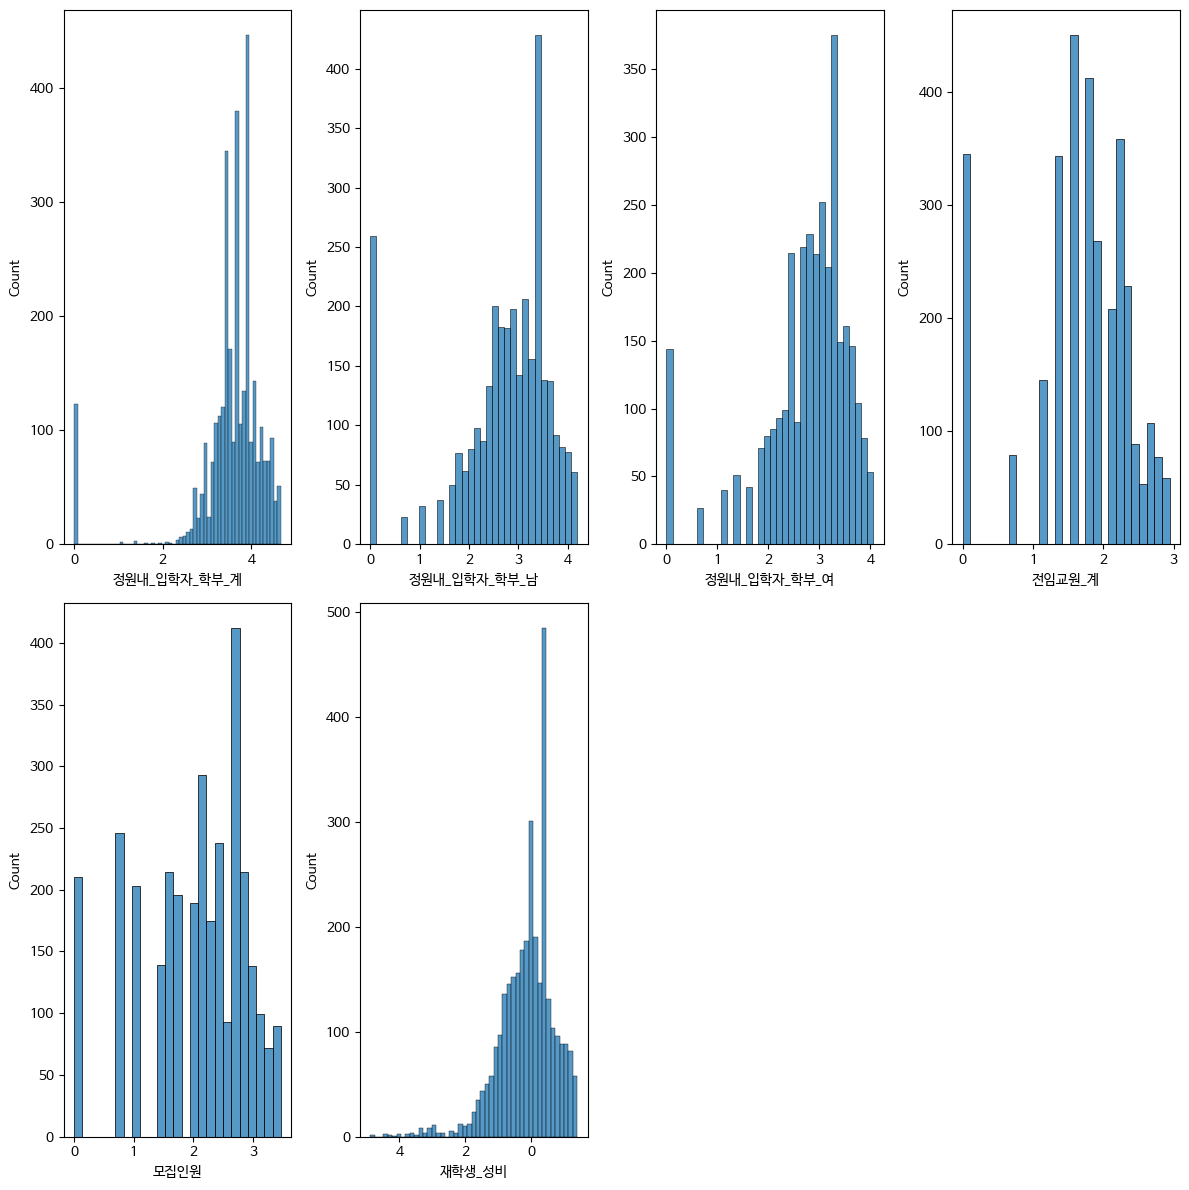

In [ ]:
# 재확인
num_plots = len(log_data_columns)
data = log_data_columns

# 그래프를 그릴 서브플롯 생성
rows, cols = 2, 4
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))

# 서브플롯에 데이터 그래프 그리기
for i, ax in enumerate(axes.flatten()):
    if i < num_plots:
        sns.histplot(data=univ_df_drop[data[i]], ax=ax)
        #ax.set_title(f'Plot {i+1}')

# 빈 서브플롯 숨기기
for i in range(num_plots, rows * cols):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#표준화를 위한 참고 코드

from sklearn.preprocessing import StandardScaler
list_numeric_columns.append('신입생충원율(정원내)')
# 가정: 'data'는 정규화할 데이터
scaler = StandardScaler()
# standardized_data = scaler.fit_transform(univ_df_drop.reshape(-1, 1))
univ_df_drop[list_numeric_columns] = scaler.fit_transform(univ_df_drop[list_numeric_columns])

### 결측치 (최종)

아직 결측치를 남겨놓은 컬럼이 있다면, 확인하고 최종 처리를 해야한다.

In [ ]:
def show_nas(df):
    # 결측치 확인하고 개수가 많은 순서로 정렬
    missing_values = df.isnull().sum()
    missing_values.sort_values(ascending=False, inplace=True)

    # 결측치가 있는 열을 반환
    return missing_values[missing_values > 0]

In [ ]:
show_nas(univ_df_drop)

Series([], dtype: int64)

# Dataframe 저장하기

In [ ]:
## 전처리가 끝나면 csv 파일이나 excel 파일로 저장한다.

# 데이터프레임명.to_csv(저장할 파일명.csv, encoding = 'cp949', index = False)
univ_df_drop.to_excel('/content/gdrive/MyDrive/BOOT/code2_final.xlsx', index=False)